In [2]:
import numpy as np
%pylab inline
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from glob import glob, iglob
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from itertools import product

Populating the interactive namespace from numpy and matplotlib


Загрузим данные

In [5]:
common_table=pd.DataFrame()
for file in iglob('taxi/*.csv'):
    a=pd.read_csv(file,index_col=[0])
    common_table=pd.concat([common_table,a,] , axis=0)
common_table.sort_index(inplace=True)
common_table.head()

KeyboardInterrupt: 

In [27]:
np.argsort(common_table.sum(axis=0))[-10:]

2491    1332
2492    1178
2493    1232
2494    1179
2495    1280
2496    1229
2497    1230
2498    1180
2499    1231
2500    1281
dtype: int64

Выберем область среди самых популярных, пусть будет 1178.

In [3]:
common_table=pd.read_pickle('taxi_all_sigs.pkl')
common_table.index=pd.to_datetime(common_table.index)

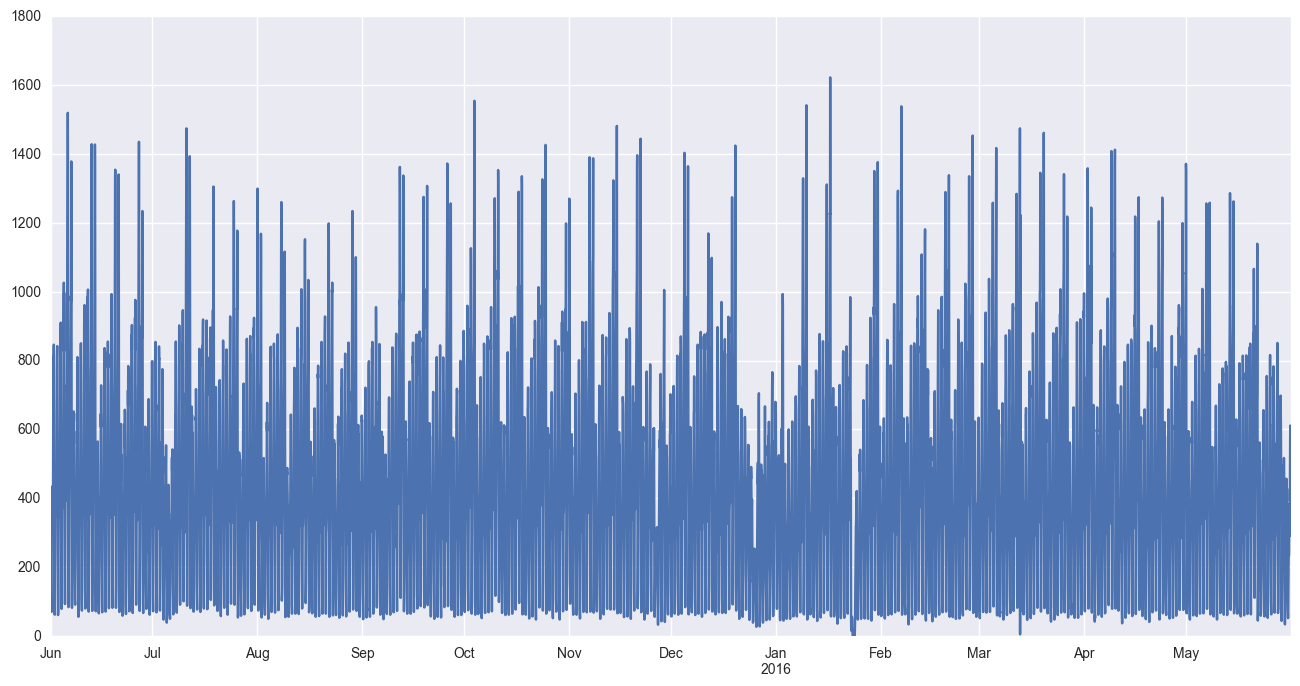

In [4]:
fig = plt.figure(figsize=(16, 8))
common_table['1178'].plot()

In [4]:
def s(x,i=1):
    return sin(x*2*pi*i/168)
def c(x,i=1):
    return cos(x*2*pi*i/168)

In [5]:
table=common_table[['1178','1']]
table.columns=['val','s1']
l=np.arange(1,len(table)+1)

Для начала возьмем по 5 признаков с sin и cos

In [6]:
table['s1']=[s(x,i=1) for x in range(1,len(table)+1)]
table['s2']=[s(x,i=2) for x in range(1,len(table)+1)]
table['s3']=[s(x,i=3) for x in range(1,len(table)+1)]
table['s4']=[s(x,i=4) for x in range(1,len(table)+1)]
table['s5']=[s(x,i=5) for x in range(1,len(table)+1)]
table['s6']=[s(x,i=6) for x in range(1,len(table)+1)]
table['s7']=[s(x,i=7) for x in range(1,len(table)+1)]
table['c1']=[c(x,i=1) for x in range(1,len(table)+1)]
table['c2']=[c(x,i=2) for x in range(1,len(table)+1)]
table['c3']=[c(x,i=3) for x in range(1,len(table)+1)]
table['c4']=[c(x,i=4) for x in range(1,len(table)+1)]
table['c5']=[c(x,i=5) for x in range(1,len(table)+1)]
table['c6']=[c(x,i=6) for x in range(1,len(table)+1)]
table['c7']=[c(x,i=7) for x in range(1,len(table)+1)]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [7]:
table.head()

val        s1        s2        s3        s4        s5  \
2015-06-01 00:00:00  265  0.037391  0.074730  0.111964  0.149042  0.185912   
2015-06-01 01:00:00  164  0.074730  0.149042  0.222521  0.294755  0.365341   
2015-06-01 02:00:00  123  0.111964  0.222521  0.330279  0.433884  0.532032   
2015-06-01 03:00:00   95  0.149042  0.294755  0.433884  0.563320  0.680173   
2015-06-01 04:00:00   81  0.185912  0.365341  0.532032  0.680173  0.804598   

                           s6        s7        c1        c2        c3  \
2015-06-01 00:00:00  0.222521  0.258819  0.999301  0.997204  0.993712   
2015-06-01 01:00:00  0.433884  0.500000  0.997204  0.988831  0.974928   
2015-06-01 02:00:00  0.623490  0.707107  0.993712  0.974928  0.943883   
2015-06-01 03:00:00  0.781831  0.866025  0.988831  0.955573  0.900969   
2015-06-01 04:00:00  0.900969  0.965926  0.982566  0.930874  0.846724   

                           c4        c5        c6        c7  
2015-06-01 00:00:00  0.988831  0.982566  0.974928  0.965926  
2015-06-01 01:00:00  0.955573  0.930874  0.900969  0.866025  
2015-06-01 02:00:00  0.900969  0.846724  0.781831  0.707107  
2015-06-01 03:00:00  0.826239  0.733052  0.623490  0.500000  
2015-06-01 04:00:00  0.733052  0.593820  0.433884  0.258819

Построим регрессионную модель

In [8]:
reg=LinearRegression()
train=table[['s1','s2','s3','s4','s5','s6','s7','c1','c2','c3','c4','c5','c6','c7']]
target=table.val
reg.fit(train,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Отобразим 1000 точек остатков модели на графике

In [10]:
pr=reg.predict(train)

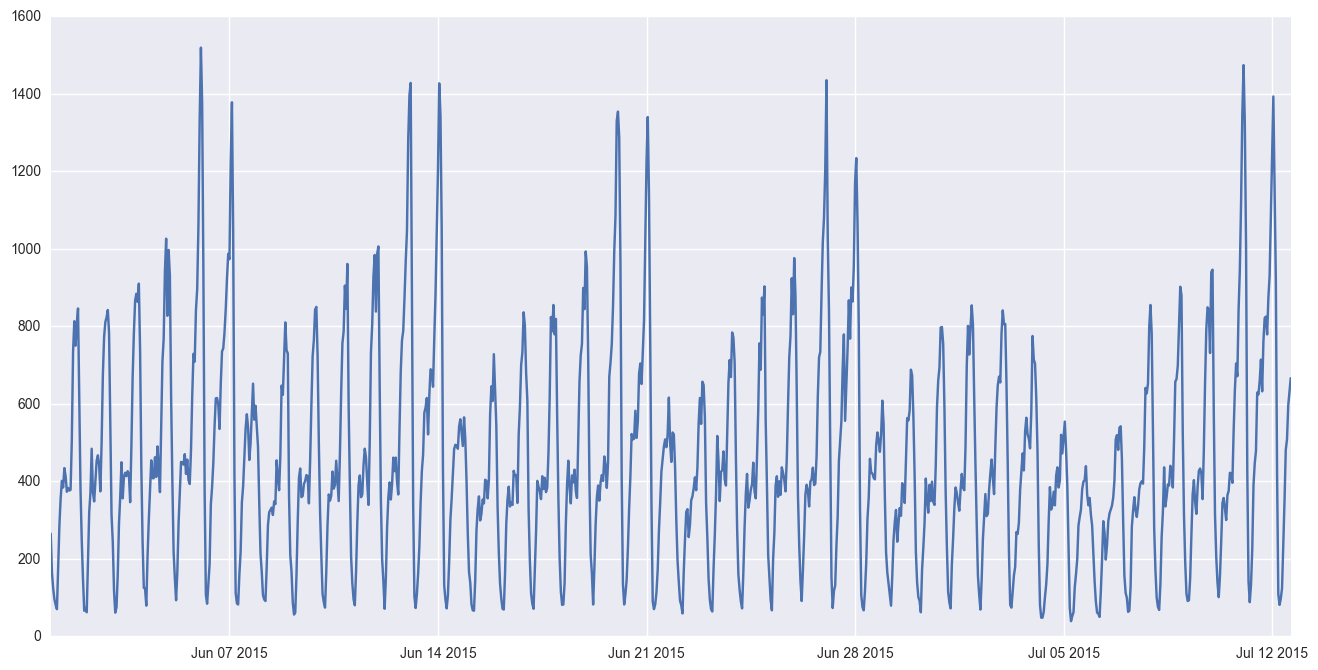

In [12]:
fig = plt.figure(figsize=(16, 8))
plt.plot((table.val)[:1000])

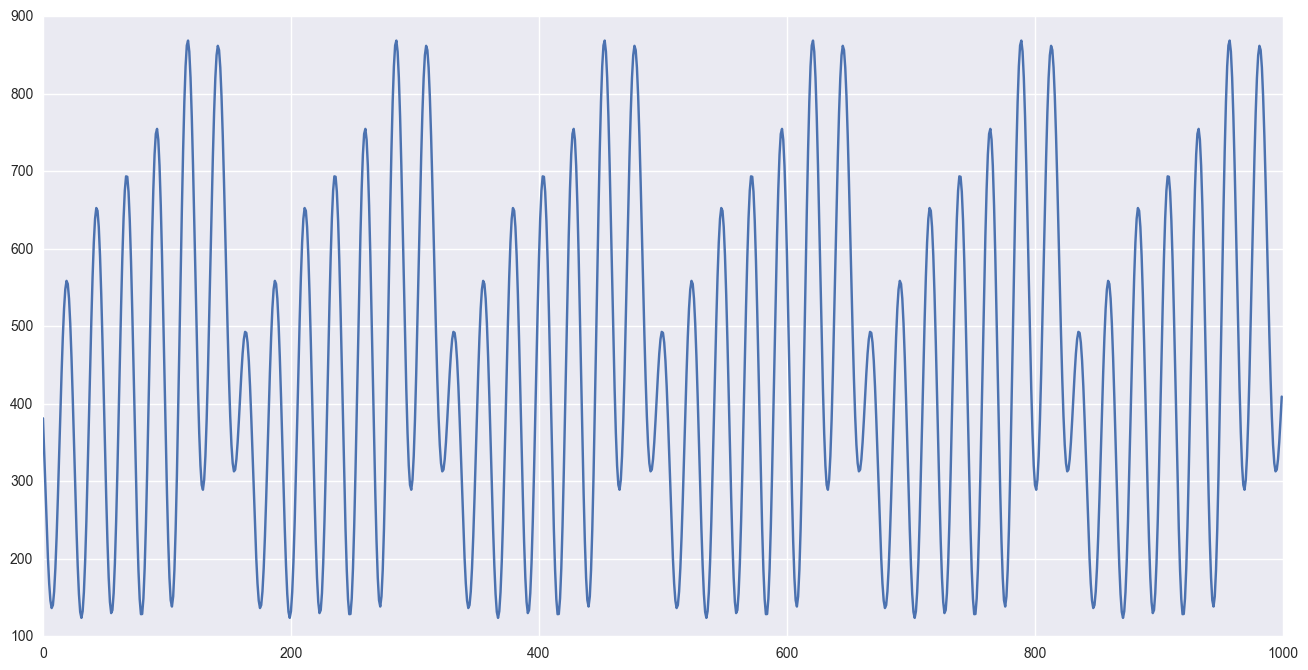

In [11]:
fig = plt.figure(figsize=(16, 8))
plt.plot((pr)[:1000])

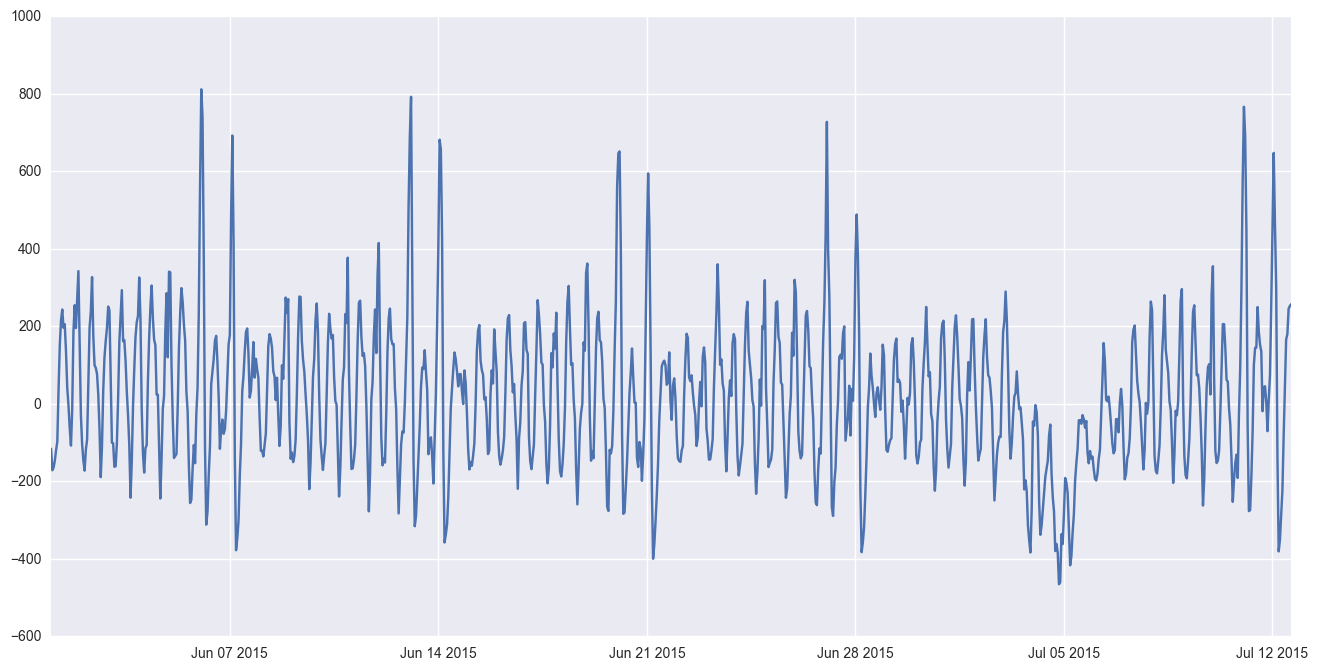

In [37]:
fig = plt.figure(figsize=(16, 8))
plt.plot((table.val-pr)[:1000])

Построим STL-декомпозицию До и После

Критерий Дики-Фуллера: p=0.000000


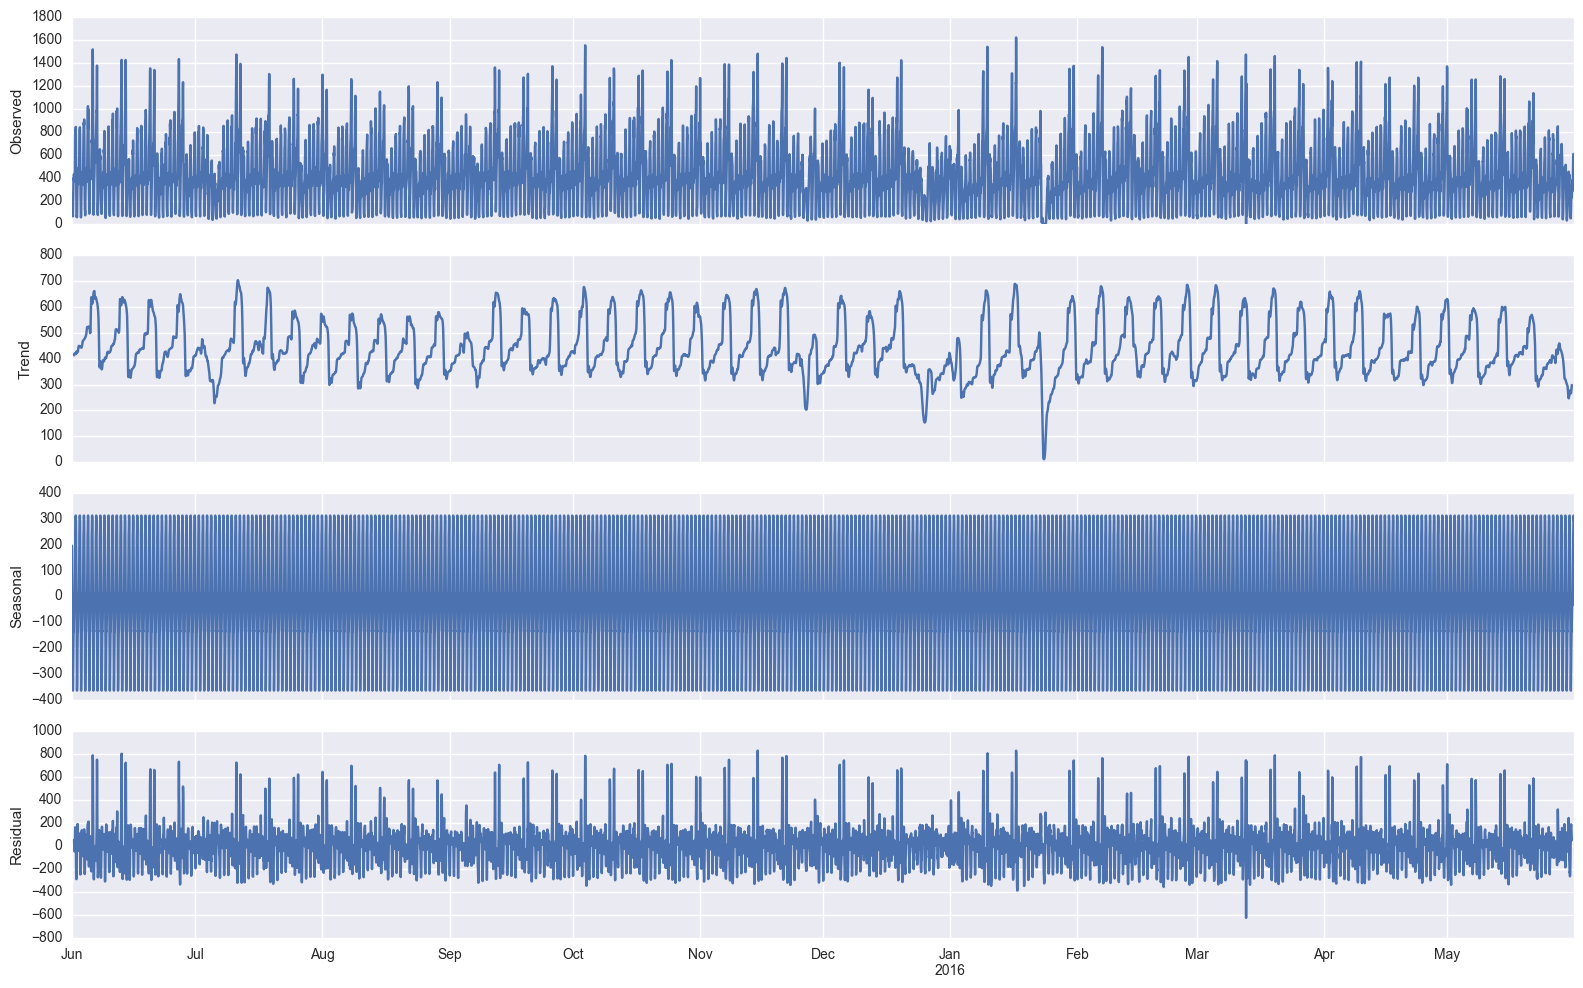

In [38]:
plt.figure(figsize(16,10))
sm.tsa.seasonal_decompose(table.val).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(table.val)[1])

Критерий Дики-Фуллера: p=0.000000


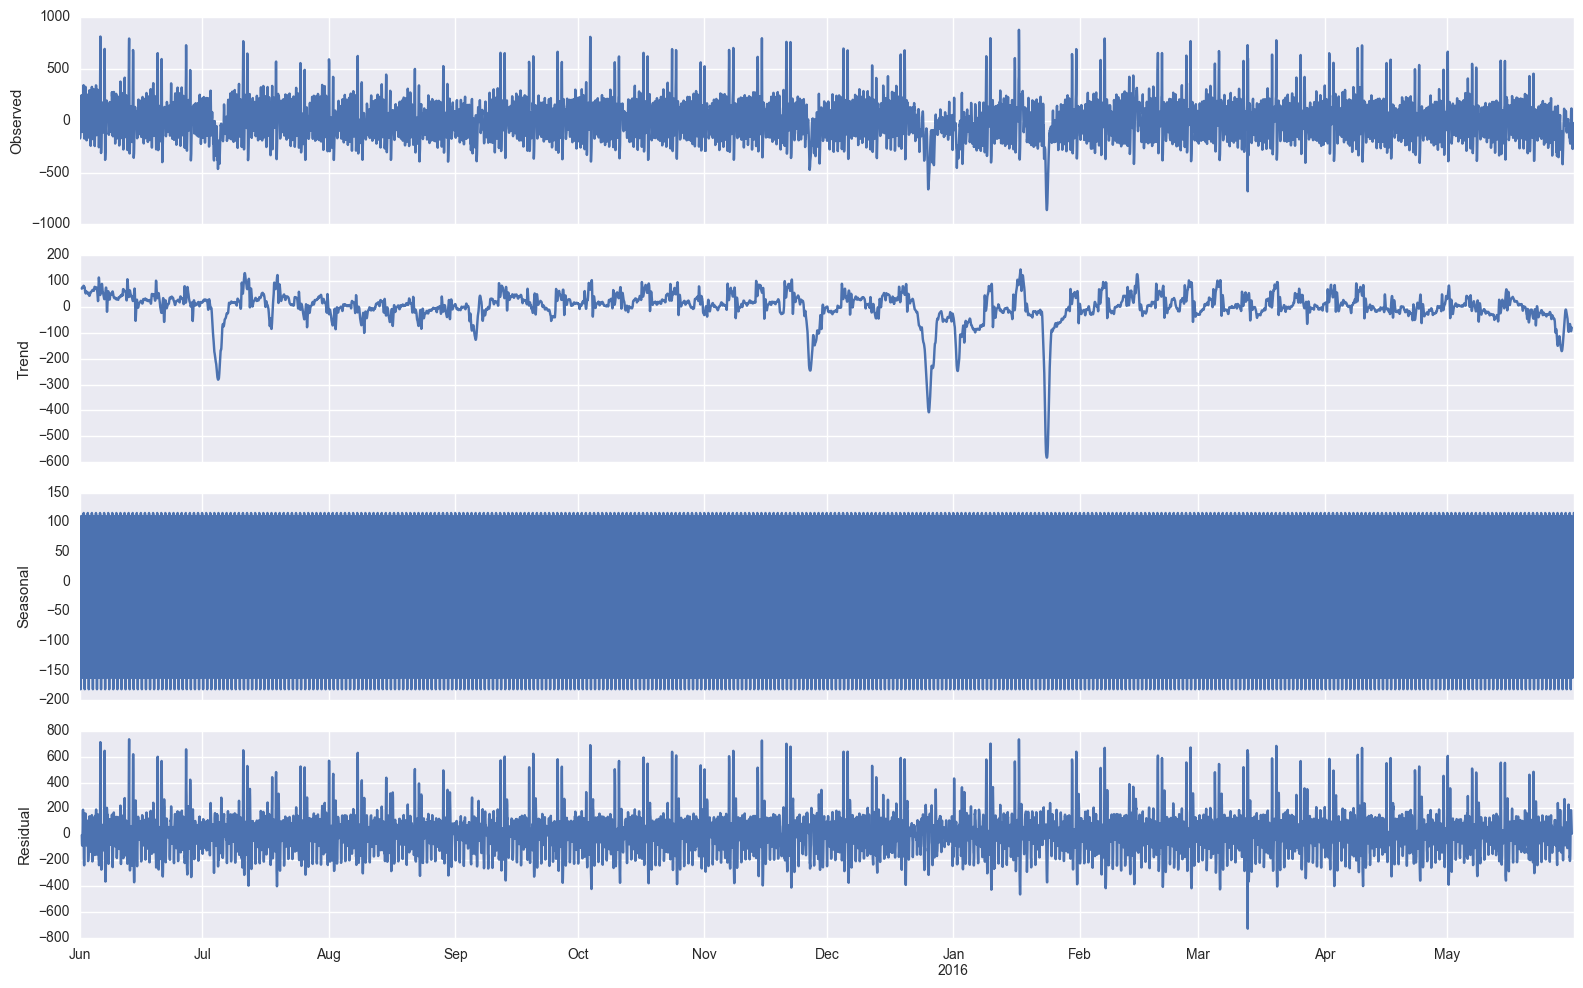

In [39]:
plt.figure(figsize(16,10))
sm.tsa.seasonal_decompose(table.val-pr).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(table.val-pr)[1])

Видим, что у тренда практически пропала сезонность, остались только аномалии, связанные с праздниками.

Добьемся стационарности ряда путем дифференцирования

In [40]:
table['reg']=table.val-pr

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Критерий Дики-Фуллера: p=0.000000


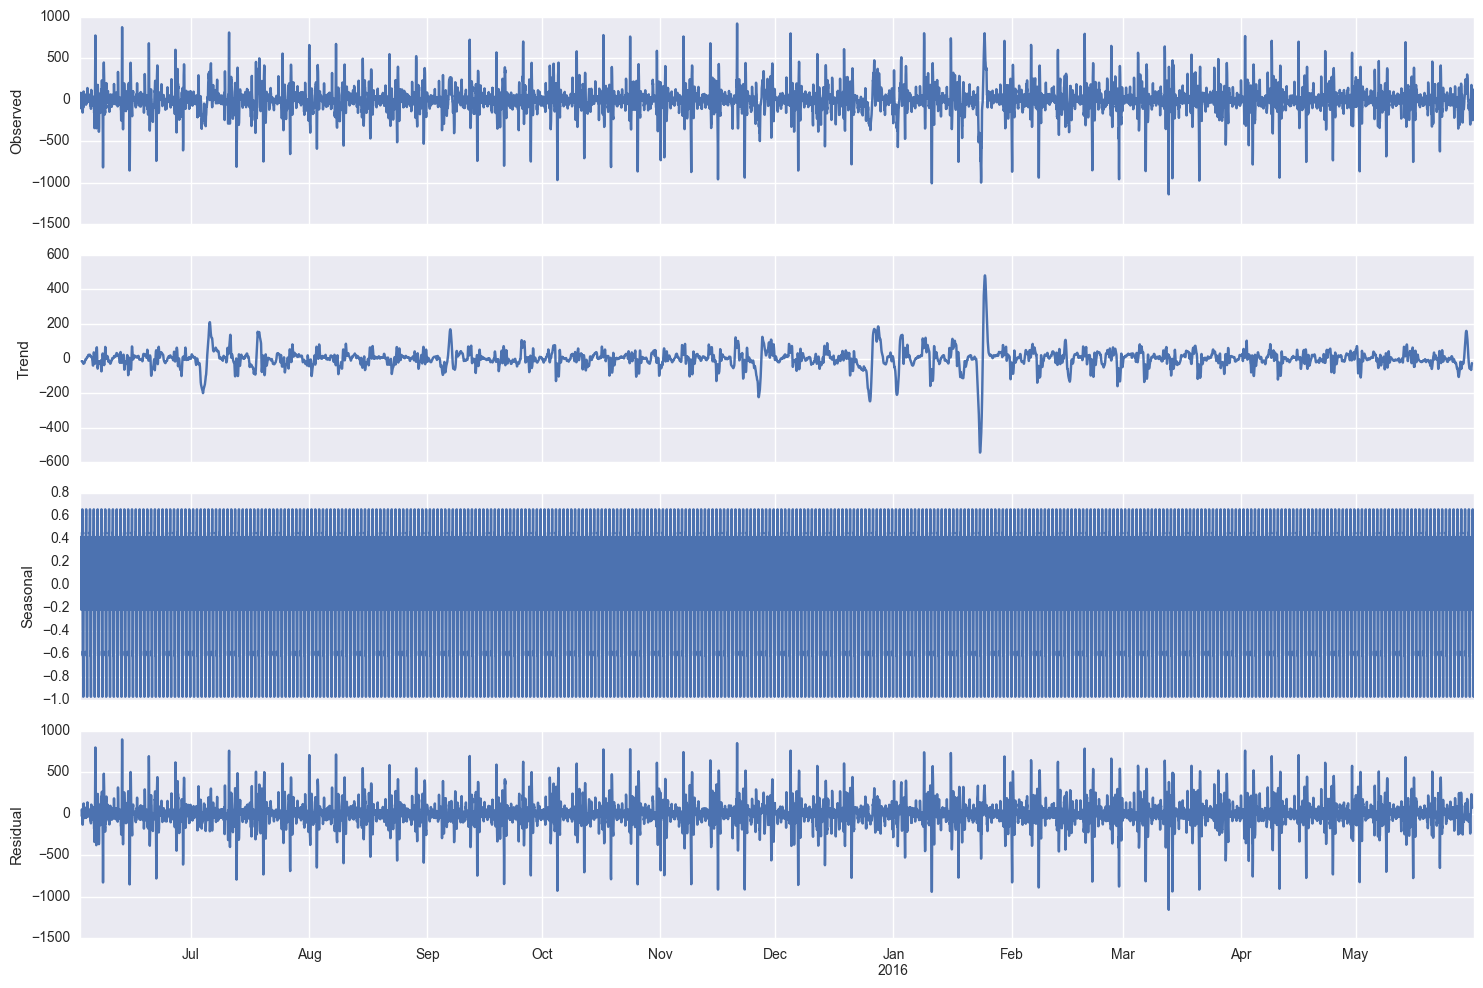

In [41]:
table['reg_box_diff'] = table.reg - table.reg.shift(24)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(table.reg_box_diff[24:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(table.reg_box_diff[24:])[1])

Еще одно дифференцирование

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Критерий Дики-Фуллера: p=0.000000


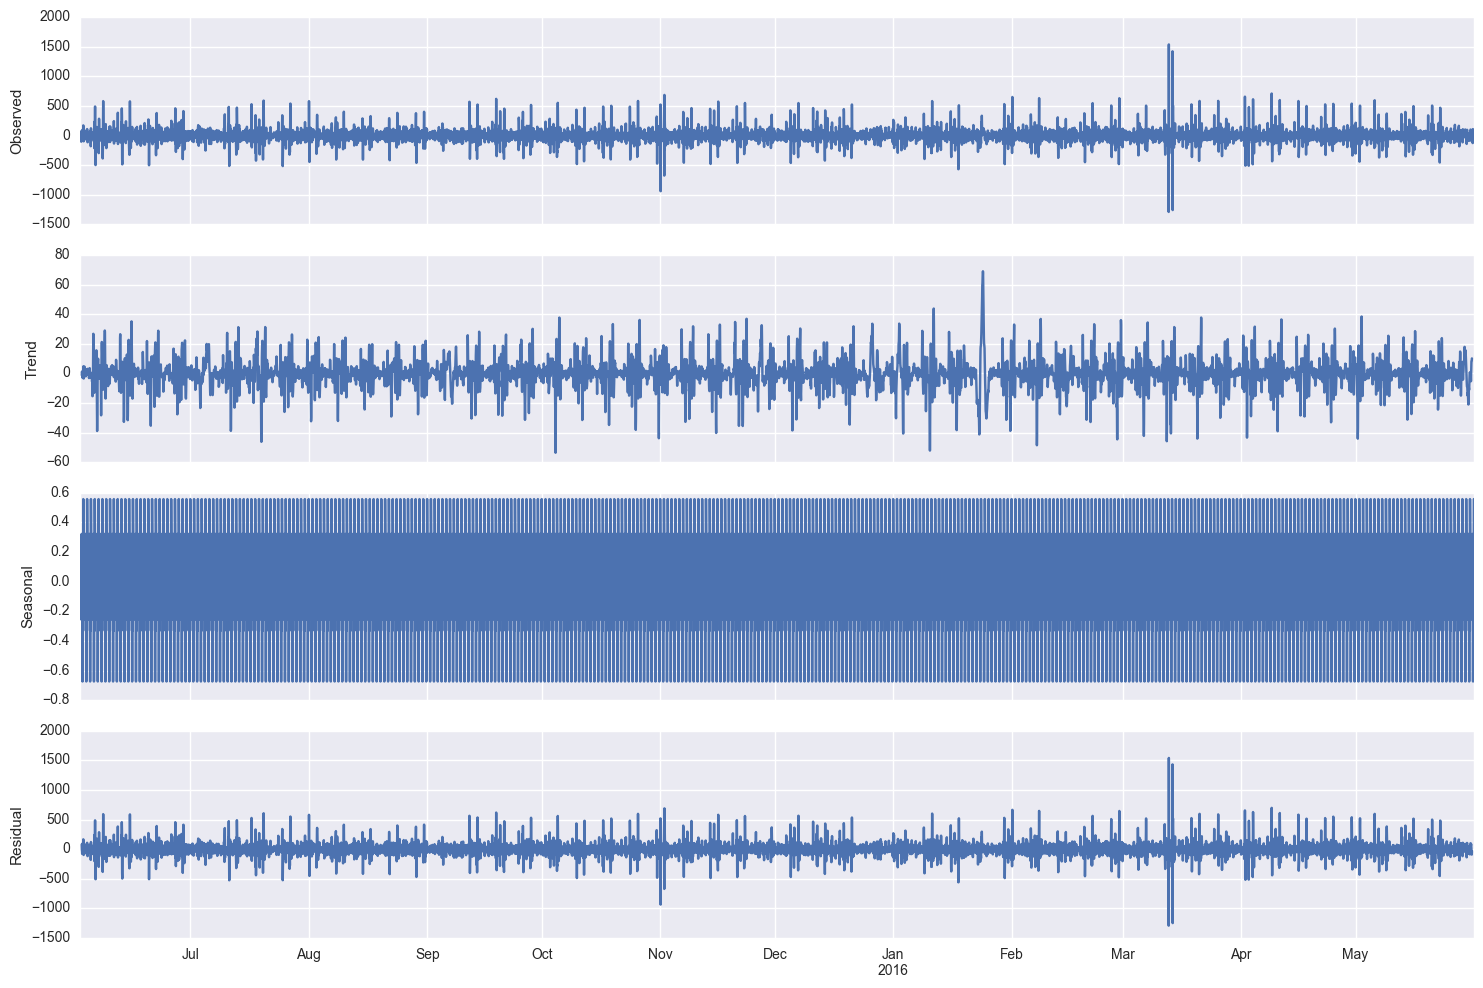

In [42]:
table['reg_box_diff2'] = table.reg_box_diff - table.reg_box_diff.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(table.reg_box_diff2[25:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(table.reg_box_diff2[25:])[1])

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Критерий Дики-Фуллера: p=0.000000


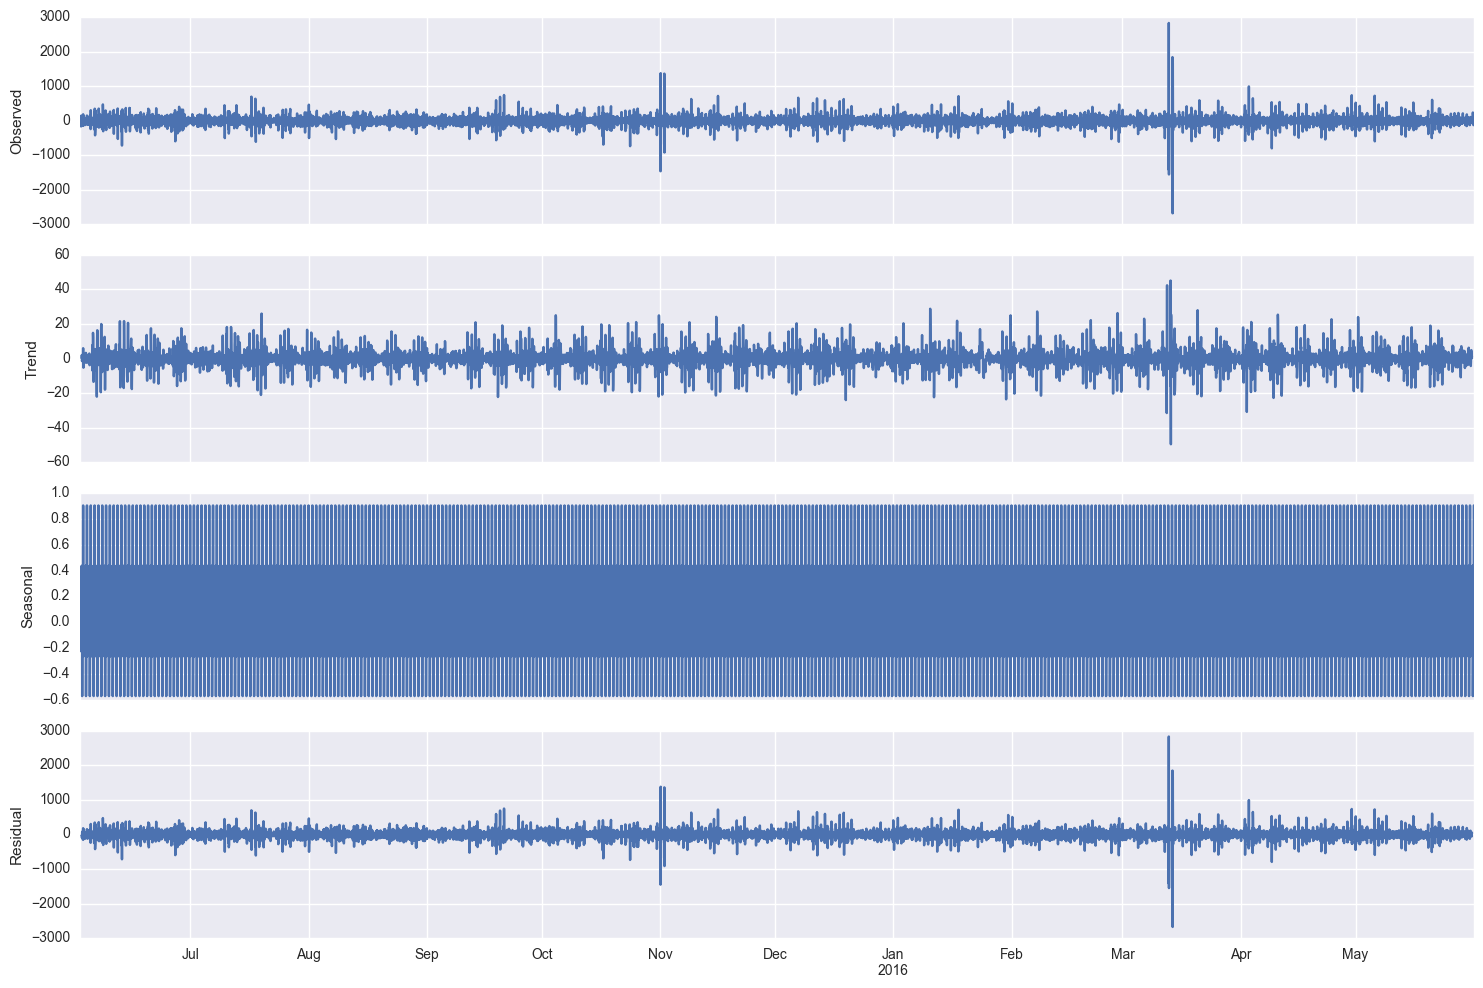

In [43]:
table['reg_box_diff3'] = table.reg_box_diff2 - table.reg_box_diff2.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(table.reg_box_diff3[26:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(table.reg_box_diff3[26:])[1])

Для наглядности первые 1000 точек

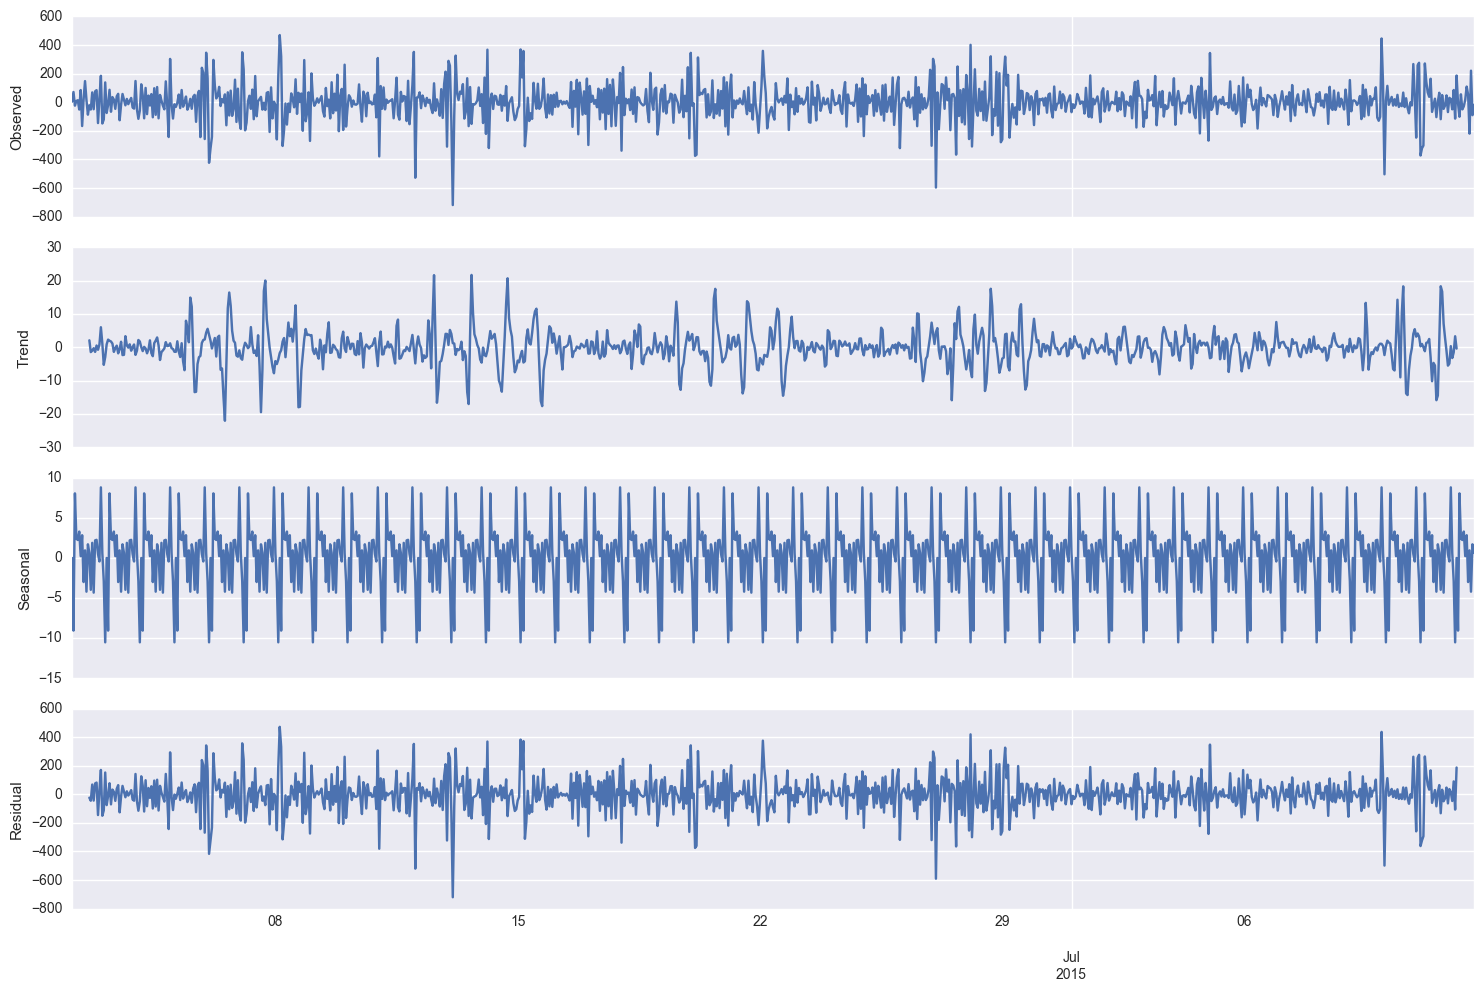

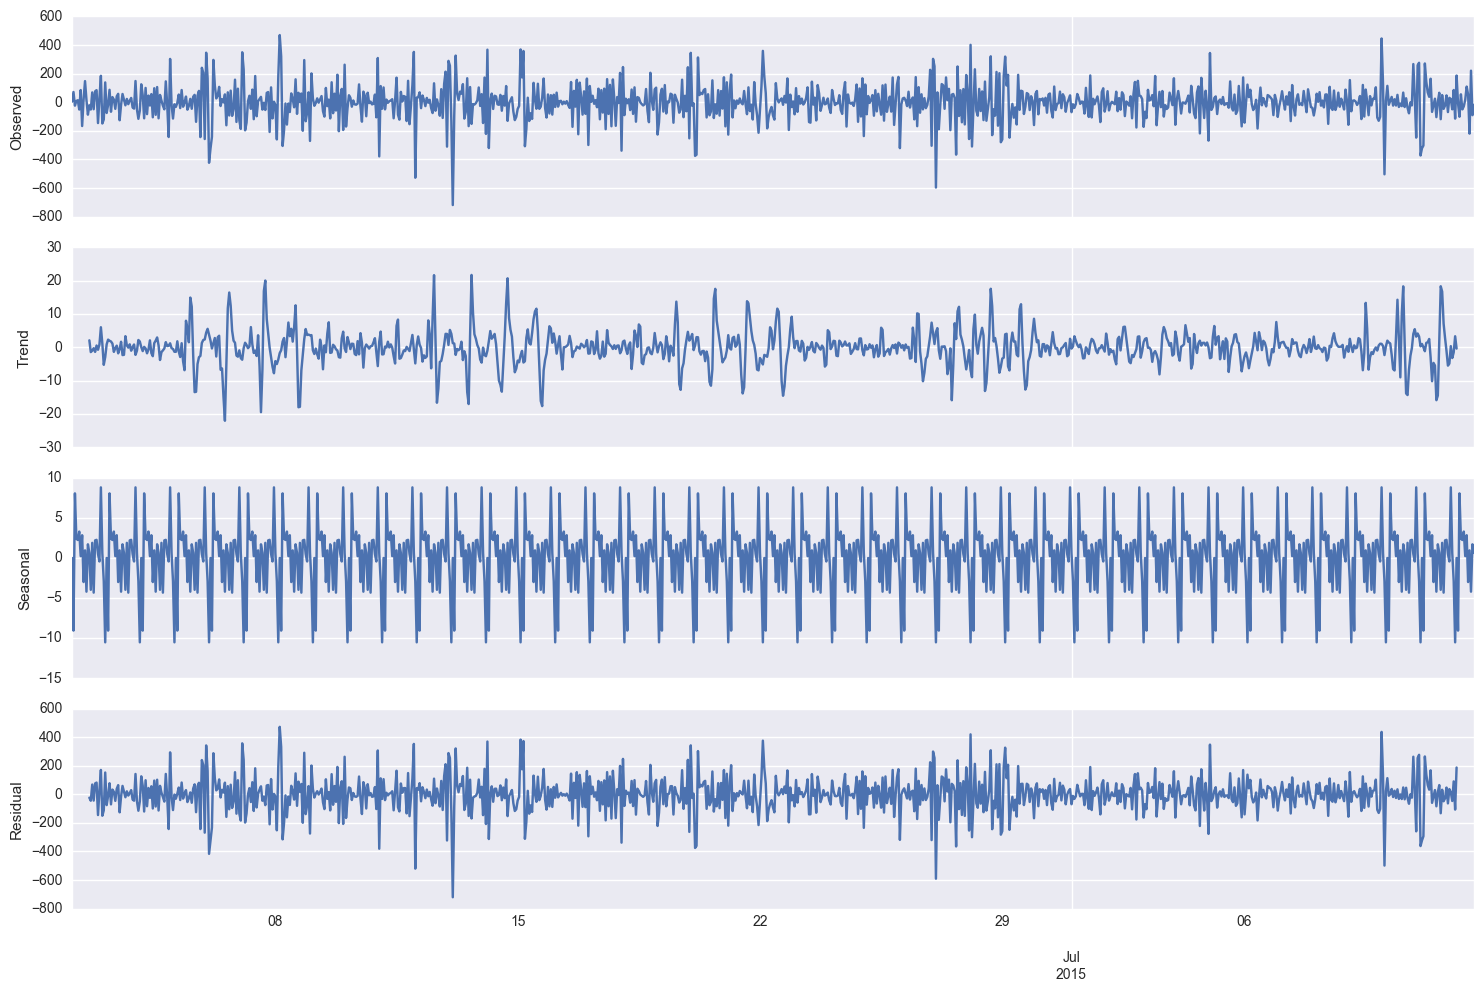

In [44]:
sm.tsa.seasonal_decompose(table.reg_box_diff3[27:1000]).plot()

Теперь можно утверждать, что остатки стационарны и нет тренда

Теперь выберем начальные приближения для $ p,P,q,Q$ модели ARIMA

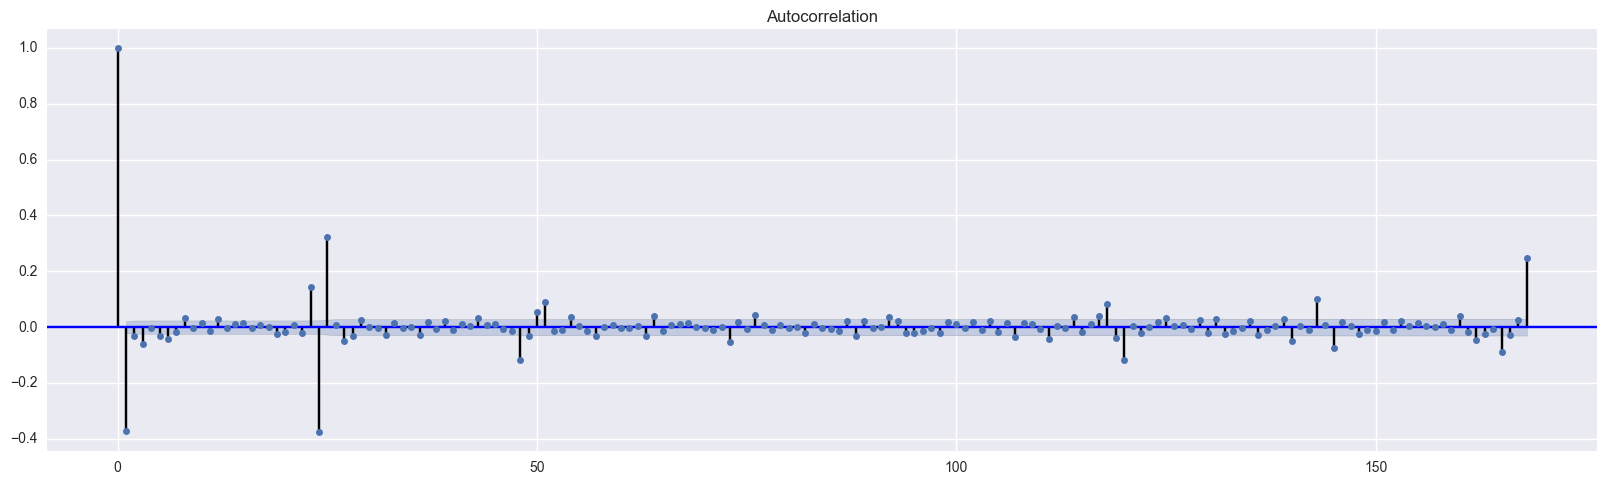

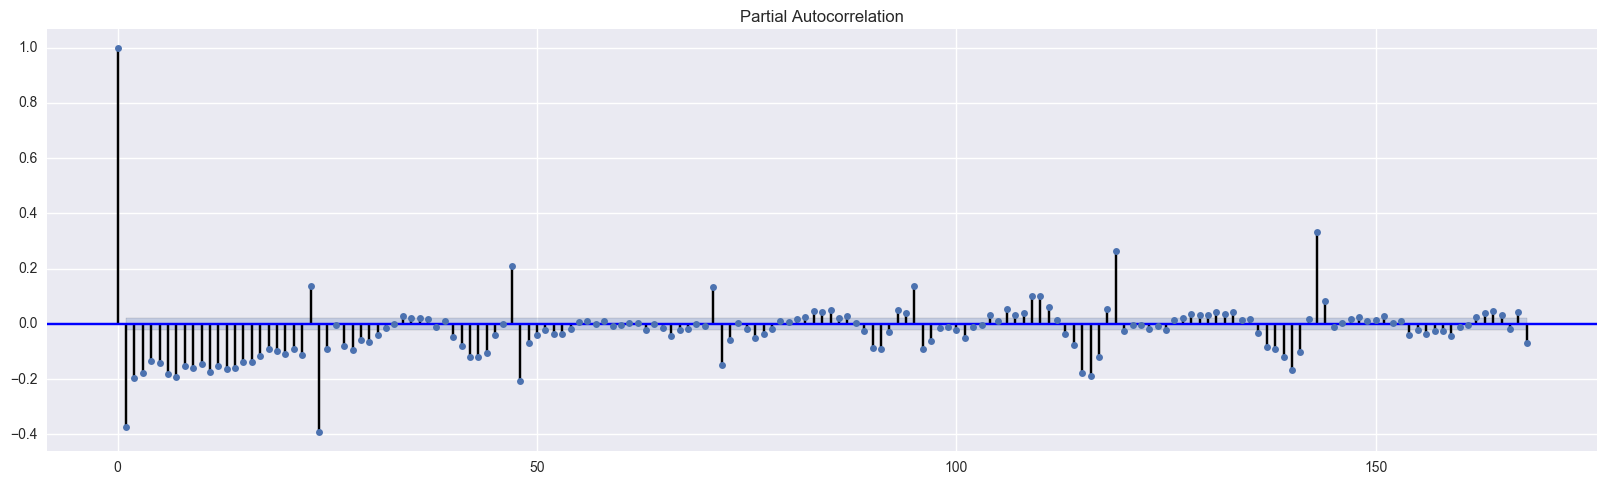

In [45]:
plt.figure(figsize(20,12))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(table.reg_box_diff3[26:].values.squeeze(), lags=168, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(table.reg_box_diff3[26:].values.squeeze(), lags=168, ax=ax)
pylab.show()

Начальные приближения: Q=1, q=3, P=6, p=23

In [15]:
ps = range(0, 3)
d=1
qs = range(0, 3)
Ps = range(0, 1)
D=1
Qs = range(0, 1)

In [16]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

9

In [17]:
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    print(param)
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(table['val'],
                                        exog=table[['s1','s2','s3','s4','s5','s6','s7','c1','c2','c3','c4','c5','c6','c7']].values ,order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 24)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

(0, 0, 0, 0)
('wrong parameters:', (0, 0, 0, 0))
(0, 1, 0, 0)
(0, 2, 0, 0)
(1, 0, 0, 0)
(1, 1, 0, 0)
(1, 2, 0, 0)
('wrong parameters:', (1, 2, 0, 0))
(2, 0, 0, 0)
(2, 1, 0, 0)
('wrong parameters:', (2, 1, 0, 0))
(2, 2, 0, 0)
('wrong parameters:', (2, 2, 0, 0))


In [18]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

     parameters           aic
4  (2, 0, 0, 0)  2.471097e+06
3  (1, 1, 0, 0)  4.812113e+06
2  (1, 0, 0, 0)  5.063515e+06
0  (0, 1, 0, 0)  5.096549e+06
1  (0, 2, 0, 0)  1.485760e+07


In [19]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                val   No. Observations:                 8784
Model:             SARIMAX(2, 1, 0)x(0, 1, 0, 24)   Log Likelihood            -1235531.541
Date:                            Mon, 20 Feb 2017   AIC                        2471097.083
Time:                                    10:31:14   BIC                        2471217.454
Sample:                                06-01-2015   HQIC                       2471138.092
                                     - 05-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -101.3790   1.46e-24  -6.94e+25      0.000    -101.379    -101.379
x2           -42.7371   9.13e-24  -

Критерий Стьюдента: p=0.051625
Критерий Дики-Фуллера: p=0.000000


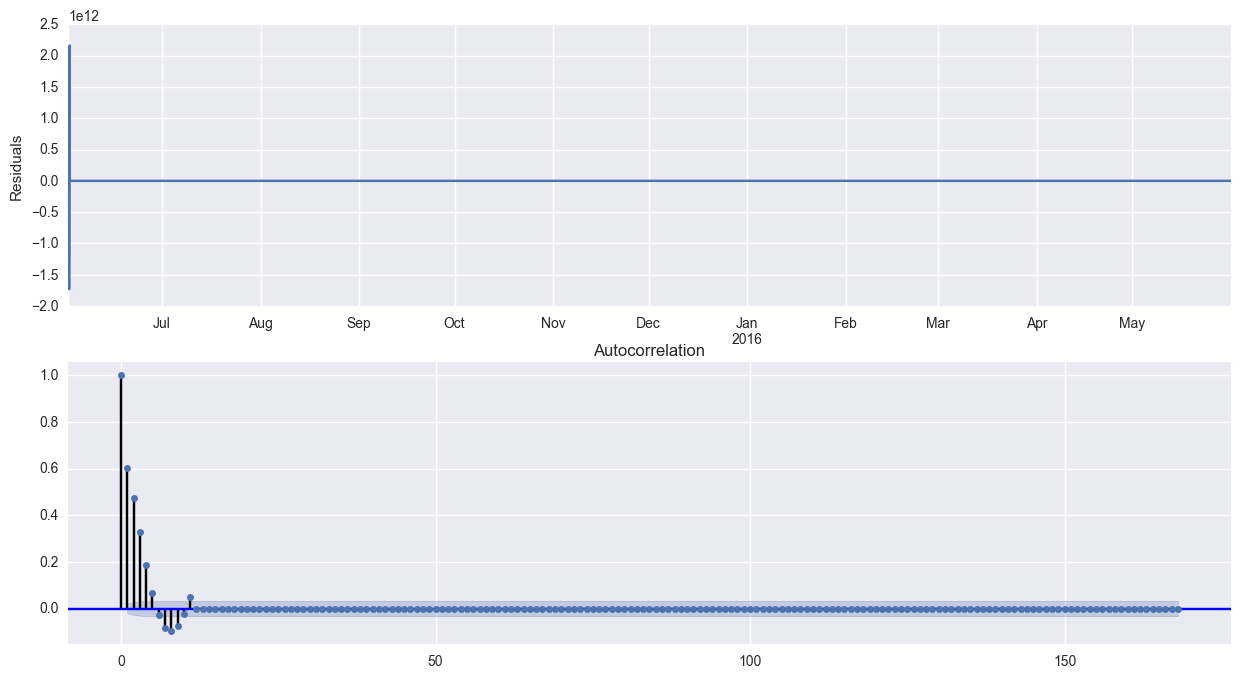

In [20]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=168, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


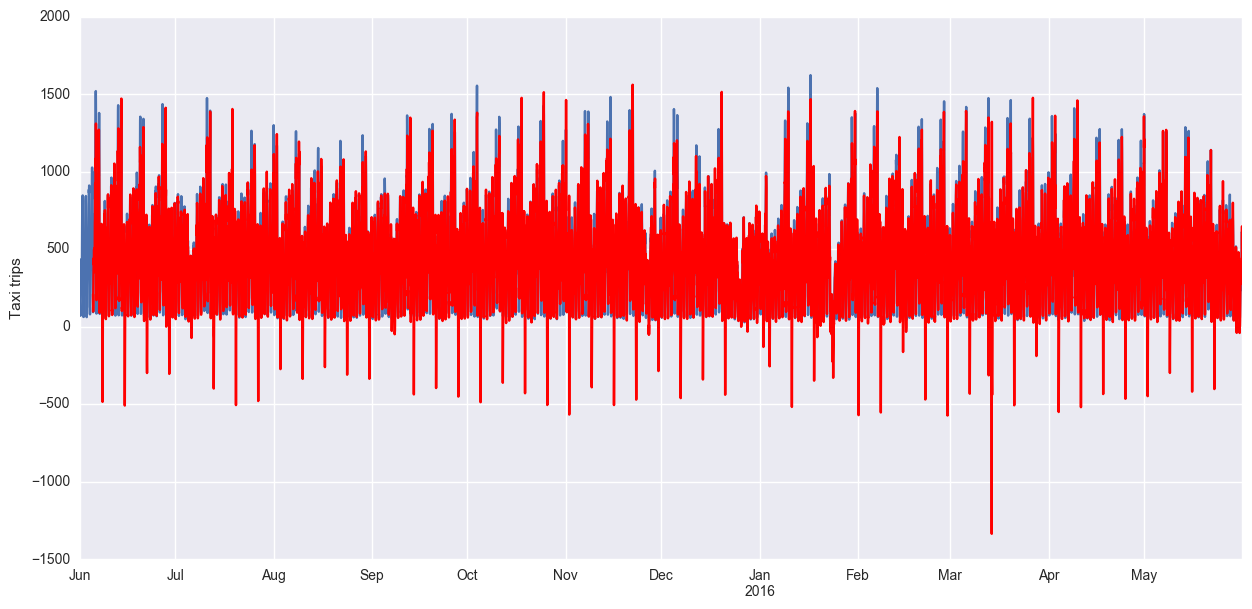

In [26]:
table['model'] = best_model.predict()
plt.figure(figsize(15,7))
table.val.plot()
table.model[100:].plot(color='r')
plt.ylabel('Taxi trips')
pylab.show()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


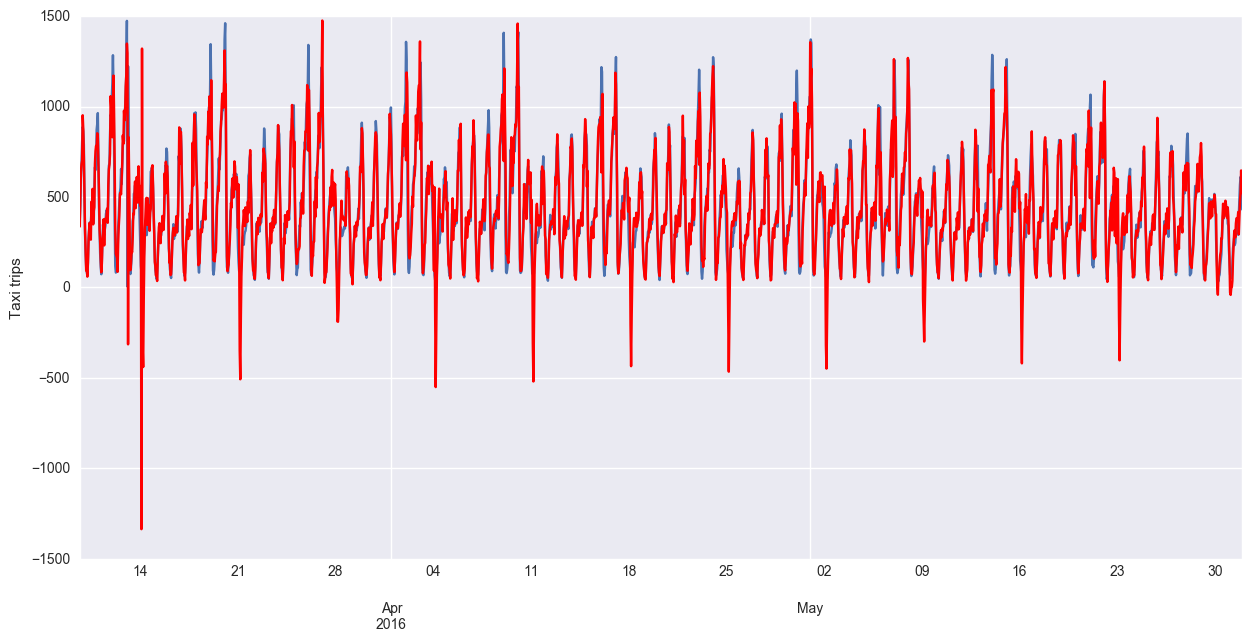

In [22]:
table['model'] = best_model.predict()
plt.figure(figsize(15,7))
table.val[-2000:].plot()
table.model[-2000:].plot(color='r')
plt.ylabel('Taxi trips')
pylab.show()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


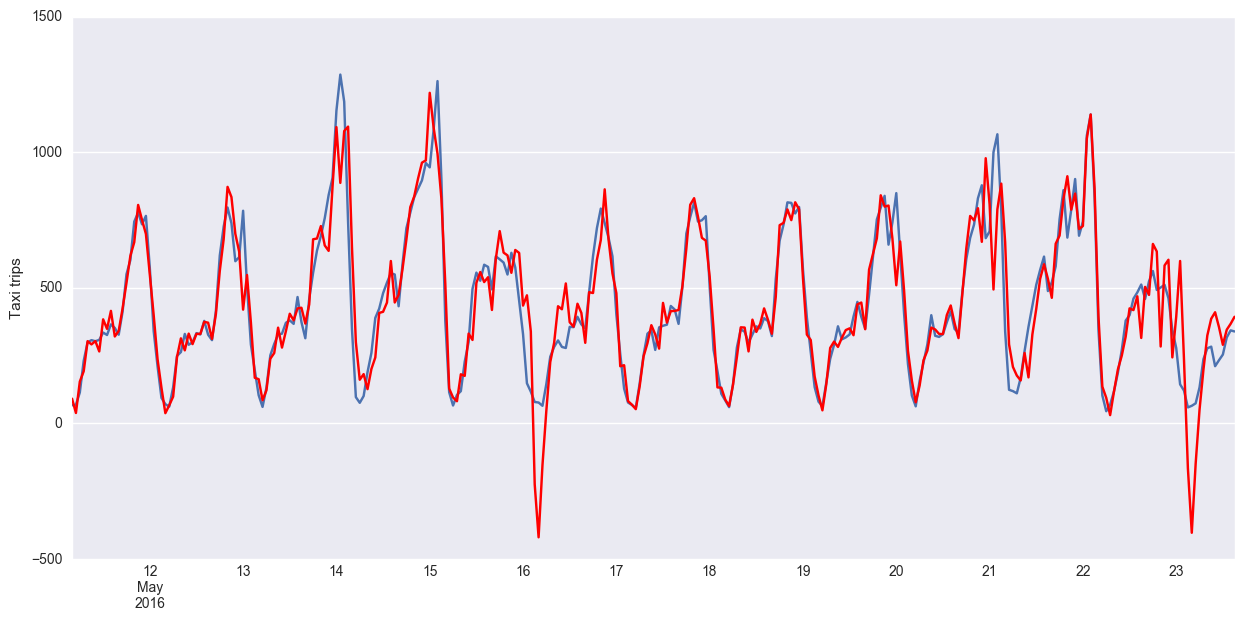

In [27]:
table['model'] = best_model.predict()
plt.figure(figsize(15,7))
table.val[-500:-200].plot()
table.model[-500:-200].plot(color='r')
plt.ylabel('Taxi trips')
pylab.show()

Модель плохо описывает провалы в ночь на понедельники, строя прогноз в отрицательную область

In [40]:
table.index

DatetimeIndex(['2015-06-01 00:00:00', '2015-06-01 01:00:00',
               '2015-06-01 02:00:00', '2015-06-01 03:00:00',
               '2015-06-01 04:00:00', '2015-06-01 05:00:00',
               '2015-06-01 06:00:00', '2015-06-01 07:00:00',
               '2015-06-01 08:00:00', '2015-06-01 09:00:00',
               ...
               '2016-05-31 14:00:00', '2016-05-31 15:00:00',
               '2016-05-31 16:00:00', '2016-05-31 17:00:00',
               '2016-05-31 18:00:00', '2016-05-31 19:00:00',
               '2016-05-31 20:00:00', '2016-05-31 21:00:00',
               '2016-05-31 22:00:00', '2016-05-31 23:00:00'],
              dtype='datetime64[ns]', length=8784, freq=None)

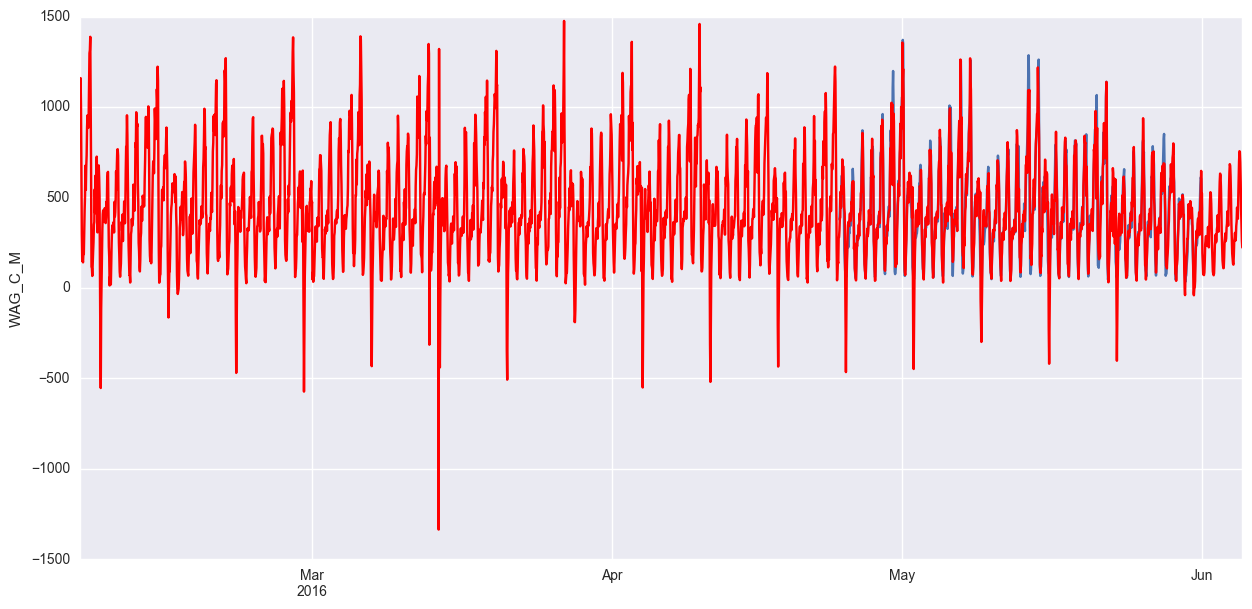

In [63]:
table2 = table[['val']]
date_list = [datetime.datetime.strptime("2016-06-01 00", "%Y-%m-%d %H") + relativedelta(hours=x) for x in range(0,100)]
future = pd.DataFrame(index=date_list, columns= table2.columns)
table2 = pd.concat([table2, future])
table2['forecast'] = best_model.predict(start=6000, end=15000,exog=table[table.columns[1:-1]][:6217])

plt.figure(figsize(15,7))
table2.val[-1000:].plot()
table2.forecast.dropna().plot(color='r')
plt.ylabel('WAG_C_M')
pylab.show()

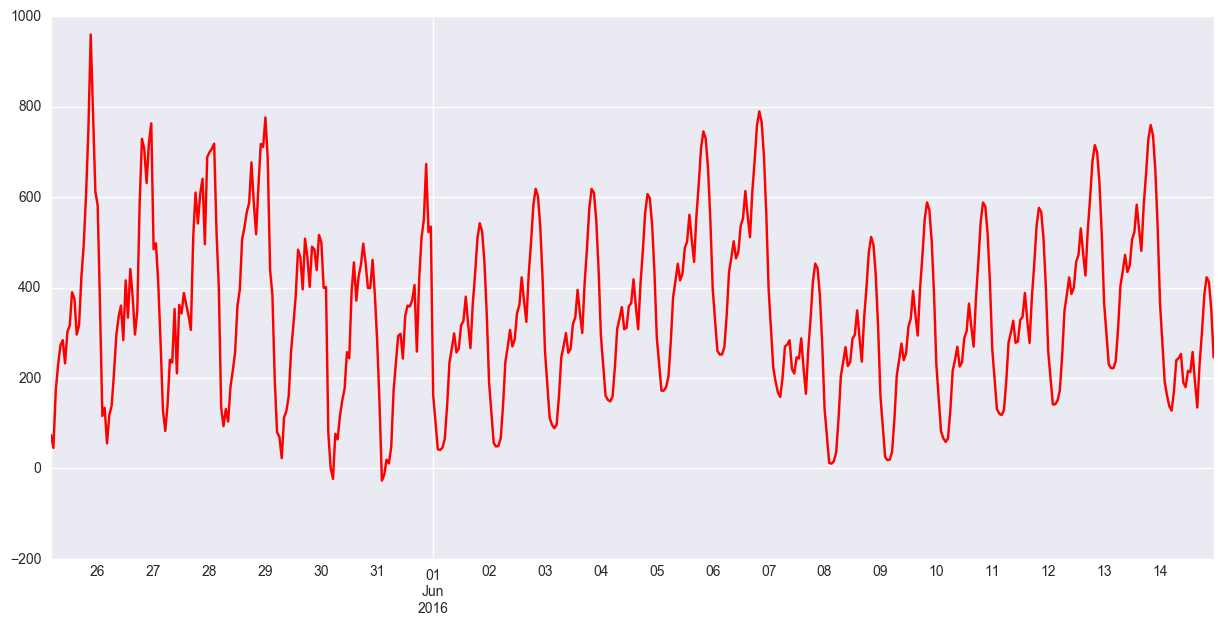

In [32]:
table2.forecast[-500:].dropna().plot(color='r')